<a href="https://colab.research.google.com/github/DyutimanRK/VAE_PPD/blob/main/CleanCode_VAE_PPDs_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE Network to find Latent Variables for PPDs - SOURCE CODE

    This notebook is used to train a VAE Neural Network to find the latent variables of a large 
    dataset of Proto-planetary Disk images (obtained from the FARGO3D simulations), and to find 
    the correlation of those latent spaces with physical parameters.

    
    Summary       : We are trying to push the boundaries of a Variational Autoencoder to scoop out 
                    hidden physical parameters within a large dataset of PPD-images, and to observe
                    the effect each of those paraemters will have on the disk images, upto a desired
                    accuracy of 70%.


    Code&Config   : The code is being done on Jupyter Notebook platform, and is being run on MacOS 13.1, 
                    Apple M1, 8gb configuration.  
               
         
________________

### Supervisor   : Dr. Sayantan Auddy
#### Written by    : Dyutiman Santra
#### Created       : 2nd March, 2023

_______________________________________

||  Importing Modules  ||

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob 


from keras import backend as K
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Lambda, Reshape
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.datasets import mnist



from sklearn.metrics import accuracy_score, precision_score, recall_score

from tensorflow.keras import layers, losses

from numpy import asarray


||  Checking the availbale number of GPUs  ||

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:",gpu.name,"Type:",gpu.device_type)
print("TensorFlow version used ",tf.__version__)

Num GPUs Available:  1
Name: /physical_device:GPU:0 Type: GPU
TensorFlow version used  2.10.0


||  Reading DATA  ||

In [ ]:
## name of the CSV file

File_Name = "CGAN_parameter_space_16Feb_2023.csv"

In [ ]:
## Reading the CSV file

df=pd.read_csv(File_Name)  

index=[]
index=df["Planet_Mass1"] # will be used to locate specific folders

print("The dataframe is:")
df

The dataframe is:


,Planet_Mass1,Planet_Mass2,Planet_Mass3,Epsilon,Alpha,Stokes,Aspect_Ratio,SigmaSlope,Flaring_Index,Rp1,Rp2,Rp3
0,0.002310,0.002390,0.00143,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
1,0.000676,0.000280,0.00144,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
2,0.000729,0.000192,0.00287,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
3,0.000414,0.001700,0.00202,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
4,0.001180,0.001680,0.00254,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000622,0.002820,0.00018,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
496,0.002980,0.000743,0.00179,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
497,0.002560,0.002020,0.00107,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2
498,0.000979,0.001870,0.00167,0.1,0.001,0.01,0.05,1.0,0.25,1.0,2.0,3.2


In [ ]:
''''## Reading the Image Dataset, from specified folders

path = "/Users/Dyutiman/Downloads/Disk_gas_plots 2" #specifying the path of the dataset

x = [] # a List to store cropped images


print(index.size)

k=1    
for i in index:
    #directory = path+"/RT_A_"+ str(i)+"/*.png" #getting the folders' directories
    directory = path+"/gas_gap_"+ str(i)+"/*.jpg" #getting the folders' directories
    data_set_indiv = glob.glob(directory)
    
    print(index.index)
    
    m = 1 #a counter variable, to view progress
    
    for j in data_set_indiv: #traversing through the 150 iamges in a folder
        a = cv2.imread(j)
        a = cv2.normalize(a, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
        m=m+1
        image = cv2.resize(a, (160,120)) #resizing the images (may be chosen to be any value in 4:3 ratio)
        
        
        ## Cropping the images (resolution after cropping = 92x92)
        hello = tf.image.crop_to_bounding_box(
               image, 15, 27, 92, 92     #this set of values is specific to the resizing parameters 160x120
               )                         #for 240x320, it would be - 28, 52, 186, 186 (resolution = 186x186)
        
        
        ## Storing the images in a List
        x.append(hello) # 'extend' instead of 'append' would multiply 1st and 2nd dimensions,
                        #  ...while retaining 3rd and 4th (4th is the rgb-3)
            
    print("folder is {} and images is {}".format(i, m)) #viewing the progress (OPTIONAL)

    
# Having stored all the necessary images in list 'x', we then convert it to an array
# The images are all COLOURED images
data_col = np.asarray(x)'''

'\'## Reading the Image Dataset, from specified folders\n\npath = "/Users/Dyutiman/Downloads/Disk_gas_plots 2" #specifying the path of the dataset\n\nx = [] # a List to store cropped images\n\n\nprint(index.size)\n\nk=1    \nfor i in index:\n    #directory = path+"/RT_A_"+ str(i)+"/*.png" #getting the folders\' directories\n    directory = path+"/gas_gap_"+ str(i)+"/*.jpg" #getting the folders\' directories\n    data_set_indiv = glob.glob(directory)\n    \n    print(index.index)\n    \n    m = 1 #a counter variable, to view progress\n    \n    for j in data_set_indiv: #traversing through the 150 iamges in a folder\n        a = cv2.imread(j)\n        a = cv2.normalize(a, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)\n    \n        m=m+1\n        image = cv2.resize(a, (160,120)) #resizing the images (may be chosen to be any value in 4:3 ratio)\n        \n        \n        ## Cropping the images (resolution after cropping = 92x92)\n        hello = tf.image.crop_to_bo

In [ ]:
## Reading the Image Dataset, from specified folders

path = "/Users/Dyutiman/Downloads/Disk_gas_plots 2" #specifying the path of the dataset

x = [] # a List to store cropped images


print(index.size)

k=1    
for i in range (1):
    #directory = path+"/RT_A_"+ str(i)+"/*.png" #getting the folders' directories
    directory = path+"/*.jpg" #getting the folders' directories
    data_set_indiv = glob.glob(directory)
    
    #print(index.index)
    
    m = 1 #a counter variable, to view progress
    
    for j in data_set_indiv: #traversing through the 150 iamges in a folder
        a = cv2.imread(j)
        a = cv2.normalize(a, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
        m=m+1
        image = cv2.resize(a, (500,500)) #resizing the images (may be chosen to be any value in 4:3 ratio)
        
        
        ## Cropping the images (resolution after cropping = 92x92)
        hello = tf.image.crop_to_bounding_box(
               image, 58, 120, 340, 340     #this set of values is specific to the resizing parameters 160x120
               )                         #for 240x320, it would be - 28, 52, 186, 186 (resolution = 186x186)
        
        
        ## Storing the images in a List
        x.append(hello) # 'extend' instead of 'append' would multiply 1st and 2nd dimensions,
                        #  ...while retaining 3rd and 4th (4th is the rgb-3)
            
    print("folder is {} and images is {}".format(i, m)) #viewing the progress (OPTIONAL)

    
# Having stored all the necessary images in list 'x', we then convert it to an array
# The images are all COLOURED images
data_col = np.asarray(x)

500
folder is 0 and images is 1528


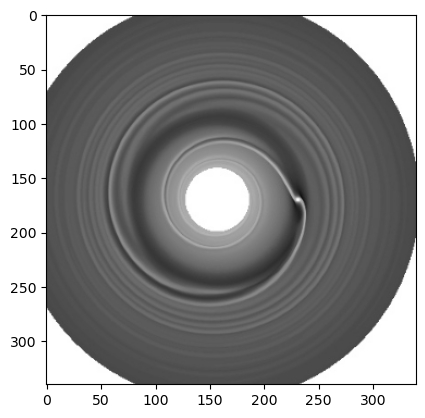

In [ ]:
plt.imshow(data_col[120])

In [ ]:
# Converting the images to Grayscale

y = [] 

for i in data_col:
    
    a = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    y.append(a.reshape(a.shape[0],a.shape[1],1))
    

# Yet again we convert from List to Array
data= np.asarray(y)
print(data.shape)

(1527, 340, 340, 1)


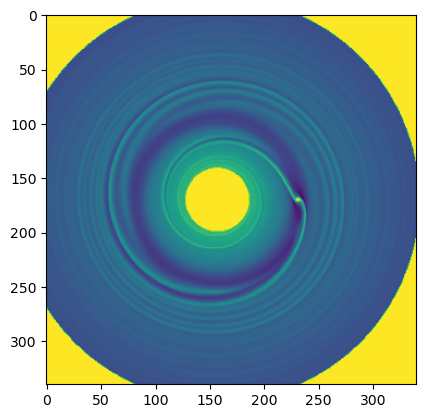

In [ ]:
plt.imshow(data[120])

Setting the Pixel (pxl) and the Batch Size (bs)

In [ ]:
pxl = 128
bs  = 150

In [ ]:
# Resizing to our desired resolution
resize_image = tf.image.resize(data, [pxl, pxl])

# Storing the data in variable 'data_images' and also storing the size of the dataset
data_images = resize_image.numpy()
data_size = data_images.shape[0]
batch_size = bs

# Setting the Label

The Label is set to any of the required parameters whose effect we would like to reflect in our Latent Space


In [ ]:
label_1 = df["Planet_Mass1"]

print("The dataframe is:")
print(label_1)

#_____________________________________________




The dataframe is:
0      0.002310
1      0.000676
2      0.000729
3      0.000414
4      0.001180
         ...   
495    0.000622
496    0.002980
497    0.002560
498    0.000979
499    0.000741
Name: Planet_Mass1, Length: 500, dtype: float64


In [ ]:
Y=[]

# METHOD 1 : TO DIRECTLY REFLECT THE VALUES

for i in range (1527):
        Y.append(1) #(label_1[i]*100000)



# METHOD 2 : ATTEMPT TO NORMALISE THE VARYING RANGES IN THE VALUES TO BETTER REFLECT THEIR EFFECT ON THE LATENT SPACE

'''for i in range (label_1.shape[0]):
    if(label_1[i]==1.57):
        for j in range(150):
            Y.append(1)    #1.57
    elif(label_1[i]==0.0157):
        for j in range(150):
            Y.append(2)    #0.0157
    elif(label_1[i]==0.00523):
        for j in range(150):
            Y.append(3)    #0.00523
    elif(label_1[i]==0.00157):
        for j in range(150):
            Y.append(4)    #0.00157
    elif(label_1[i]==0.000157):
        for j in range(150):
            Y.append(5)    #0.000157

#   else:
#       for j in range(150):
#           Y.append(-1)
    


Y_label=np.asarray(Y)
print(Y_label.size)


### Old data - For planet masses
###  1 -> 2250     27750
###  2 -> 900      5050
###  3 -> 1800     12000
###  4 -> 10050    60000'''

Y_label=np.asarray(Y)
print(Y_label.size)

1527


In [ ]:
# Checking the number of images and corresponding labels (if any)

print(data_images.shape)
print(Y_label.shape)

(1527, 128, 128, 1)
(1527,)


### Splitting the Dataset into Train and Test



We keep the randomness at some fixed state (42)

75% of data is used for Training the network and 25% of data is used for Testing the same

And of course, the data is shuffled to remove bias

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_images, Y_label,
                                   random_state=42, 
                                   test_size=0.25, 
                                   shuffle=True)

In [ ]:
print(y_test[2])

1


In [ ]:
print("The shape of X_train is", X_train.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of X_test  is", X_test.shape)
print("The shape of y_test  is", y_test.shape)

The shape of X_train is (1145, 128, 128, 1)
The shape of y_train is (1145,)
The shape of X_test  is (382, 128, 128, 1)
The shape of y_test  is (382,)


#### Moving forward with the VAE Network

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
np.random.seed(25)
tf.executing_eagerly()

False

In [ ]:
# A function to compute the value of latent space

def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.int_shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim))
    return mu + K.exp(sigma/2)*eps

TYPES OF LOSS FUNCTIONS:

1) Regression Loss Functions — used in regression neural networks; given an input value, the model predicts a corresponding output value (rather than pre-selected labels).
Ex - Mean Squared Error, Mean Absolute Error

2) Classification Loss Functions — used in classification neural networks; given an input, the neural network produces a vector of probabilities of the input belonging to various pre-set categories — can then select the category with the highest probability of belonging.
Ex - Binary Cross-Entropy, Categorical Cross-Entropy

3) Custom Loss Functions -
• Kullback-Leibler (KL) divergence loss
• Mean Absolute Error (MAE)
• Mean Absolute Percentage Error (MAPE) 
• Mean Squared Error (MSE)
• Mean Squared Logarithmic Error (MSLE)
• Binary Crossentropy Loss
• Binary Focal Crossentropy Loss
• Sparse Categorical Crossentropy Loss
• Categorical Hinge Loss
• Hinge Loss
• Cosine Similarity
• Logcosh
• Huber loss
• Poisson loss


###### LINK: https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9

In [ ]:
# The loss function used here for VAE is KLD

def kl_reconstruction_loss(true, pred):
    
    # Reconstruction loss (binary crossentropy)
    reconstruction_loss = binary_crossentropy(K.flatten(true), K.flatten(pred)) * img_width * img_height

    # KL divergence loss
    kl_loss = 1 + sigma - K.square(mu) - K.exp(sigma)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    
    # Total loss = 50% rec + 50% KL divergence loss
    return K.mean(reconstruction_loss + kl_loss)

In [ ]:
# A function to display image sequence

def display_image_sequence(x_start, y_start, x_end, y_end, no_of_imgs):
    x_axis = np.linspace(x_start,x_end,no_of_imgs)
    y_axis = np.linspace(y_start,y_end,no_of_imgs)
    
    x_axis = x_axis[:, np.newaxis]
    y_axis = y_axis[:, np.newaxis]
    
    new_points = np.hstack((x_axis, y_axis))
    new_images = decoder.predict(new_points)
    new_images = new_images.reshape(new_images.shape[0], new_images.shape[1], new_images.shape[2])
    
    # Display some images
    fig, axes = plt.subplots(ncols=no_of_imgs, sharex=False,
                             sharey=True, figsize=(20, 7))
    counter = 0
    for i in range(no_of_imgs):
        axes[counter].imshow(new_images[i], cmap='gray')
        axes[counter].get_xaxis().set_visible(False)
        axes[counter].get_yaxis().set_visible(False)
        counter += 1
    plt.show()

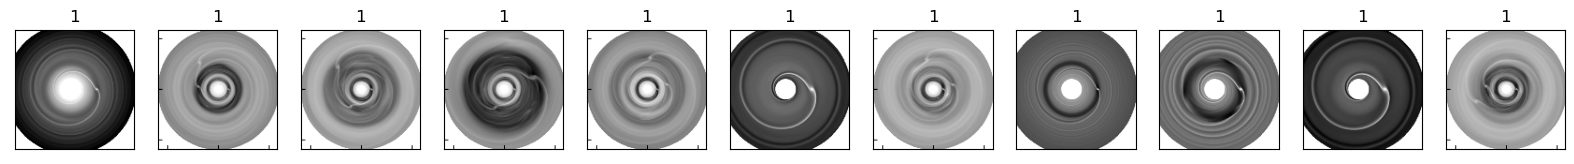

In [ ]:
# Displaying 120th to 129th data

n_col=11

fig, axes = plt.subplots(ncols=n_col, sharex=False,
    sharey=True, figsize=(20, 7))
counter = 0

for i in range(120, 120 + n_col):
    axes[counter].set_title(y_train[i])
    axes[counter].imshow(X_train[i], cmap='gray')
    axes[counter].get_xaxis().set_visible(False)
    axes[counter].get_yaxis().set_visible(False)
    counter += 1
    
plt.show()

In [ ]:
X_train_new = X_train
X_test_new = X_test

In [ ]:
# Defining some variables

img_height   = X_train_new.shape[1]    # usually worked with 64
img_width    = X_train_new.shape[2]    # usually worked with 64
num_channels = X_train_new.shape[3]    # 1
input_shape =  (img_height, img_width, num_channels)   # (64,64,1)

latent_dim = 2    # Dimension of the latent space

In [ ]:
# Constructing encoder

encoder_input = Input(shape=input_shape)

encoder_conv = Conv2D(filters=32, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=64, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)
encoder_conv = Conv2D(filters=128, kernel_size=3, strides=2, 
                padding='same', activation='relu')(encoder_input)

encoder = Flatten()(encoder_conv)

mu = Dense(latent_dim)(encoder)
sigma = Dense(latent_dim)(encoder)

latent_space = Lambda(compute_latent, output_shape=(latent_dim,))([mu, sigma])

In [ ]:
# Take the convolution shape to be used in the decoder
conv_shape = K.int_shape(encoder_conv)

In [ ]:
# Constructing decoder

decoder_input = Input(shape=(latent_dim,))
decoder = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
decoder = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(decoder)

decoder_conv = Conv2DTranspose(filters=128, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=64, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)
decoder_conv = Conv2DTranspose(filters=32, kernel_size=3, strides=2, 
                           padding='same', activation='relu')(decoder)

decoder_conv =  Conv2DTranspose(filters=num_channels, kernel_size=3, 
                          padding='same', activation='sigmoid')(decoder_conv)


In [ ]:
# Actually build encoder, decoder and the entire VAE

encoder = Model(encoder_input, latent_space)
decoder = Model(decoder_input, decoder_conv)
vae = Model(encoder_input, decoder(encoder(encoder_input)))

In [ ]:
# Compile the model using KL loss

vae.compile(optimizer='adam', loss=kl_reconstruction_loss)

In [ ]:
# Training VAE

history = vae.fit(x=X_train_new, y=X_train_new, epochs=30, batch_size=bs, validation_data=(X_test_new,X_test_new))

Train on 1145 samples, validate on 382 samples
Epoch 1/30


2023-03-09 19:49:35.303664: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-09 19:49:35.303690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-09 19:49:35.318227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-03-09 19:49:35.343487: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-09 19:49:35.383302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-09 19:49:35.490116: I tensorflow/core/grappler/optimizers/custom_graph

1145/1145 [==============================] - ETA: 0s - loss: 11346.1406

/opt/miniconda3/envs/tensorflow2/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-03-09 19:49:42.777102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1145/1145 [==============================] - 9s 7ms/sample - loss: 11346.1406 - val_loss: 11090.6565
Epoch 2/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 10364.8675 - val_loss: 9442.1338
Epoch 3/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 9062.9251 - val_loss: 8547.2190
Epoch 4/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8483.2328 - val_loss: 8317.9676
Epoch 5/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8320.5121 - val_loss: 8217.7152
Epoch 6/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8250.9847 - val_loss: 8176.6732
Epoch 7/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8199.0381 - val_loss: 8130.0703
Epoch 8/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8155.0893 - val_loss: 8069.6064
Epoch 9/30
1145/1145 [==============================] - 8s 7ms/sample - loss: 8115.9450 - val_loss: 8029.2592
Epoch 10/30
1145/1

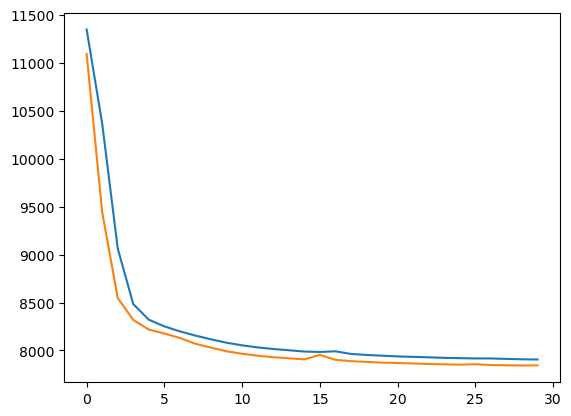

In [ ]:
# Plotting loss value decrease

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Transform images to points in latent space using encoder

encoded = encoder.predict(X_train_new)

/opt/miniconda3/envs/tensorflow2/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-09 19:53:26.023106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


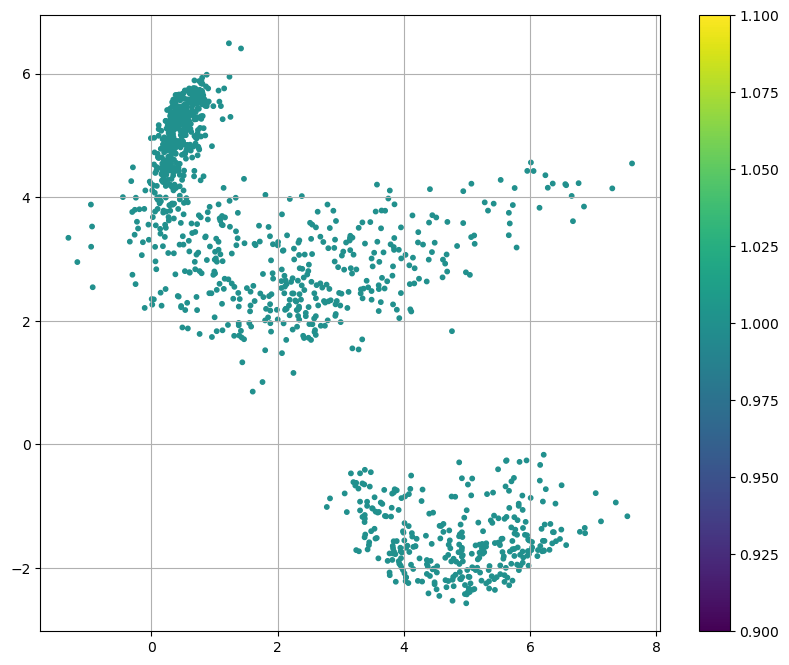

In [ ]:
# Displaying images in latent space
plt.figure(figsize=(10,8))
plt.scatter(encoded[:,0], encoded[:,1], s=10, 
            c=y_train, 
            cmap='viridis')
plt.colorbar()
plt.grid()
plt.show()

2023-03-09 19:55:00.824977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


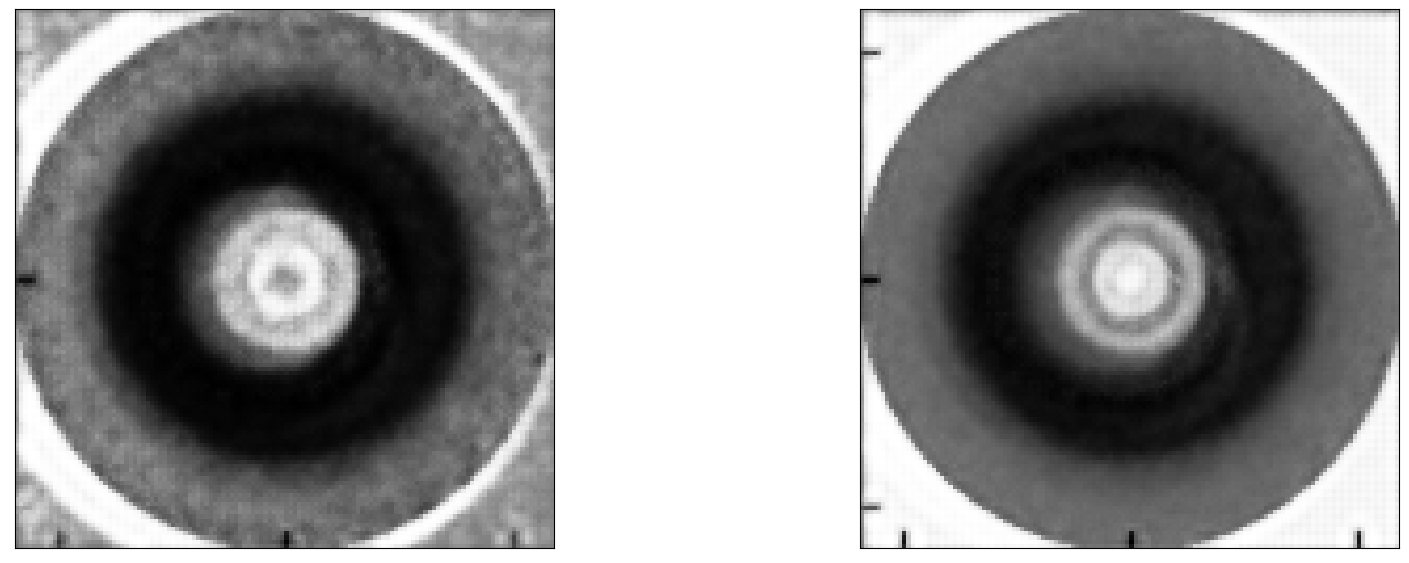

In [ ]:
# Starting point=(0,2), end point=(2,0)
display_image_sequence(0,-4,2,-2,2)

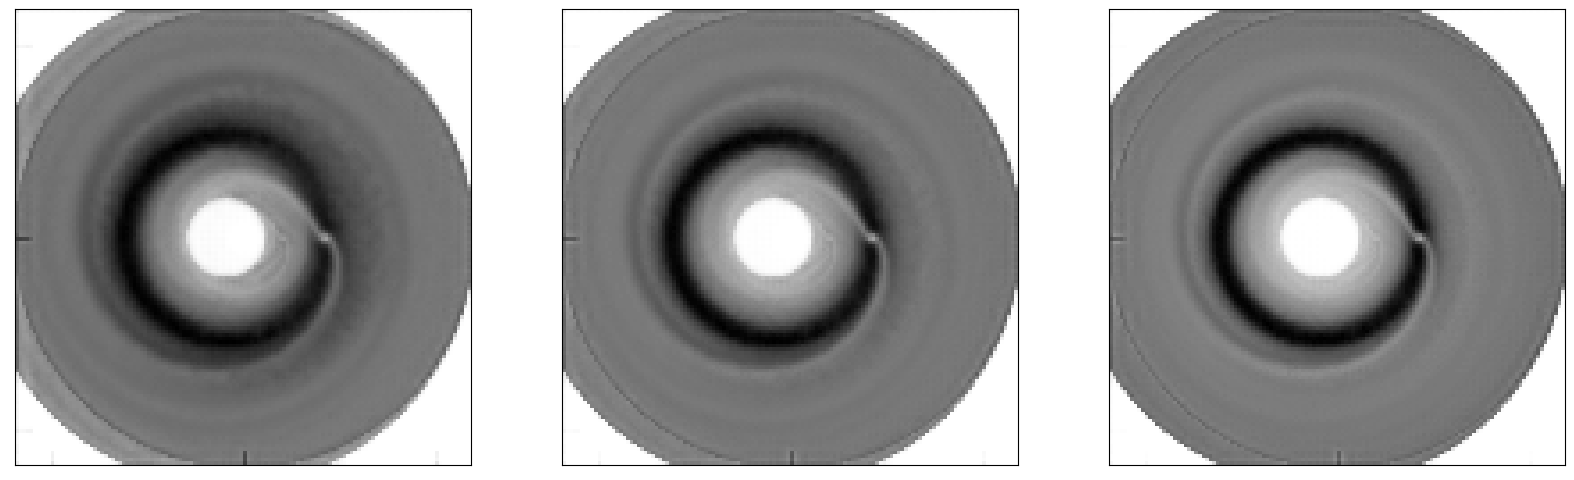

In [ ]:
# Displaying several new images
# Starting point=(0,2), end point=(2,0)
display_image_sequence(2.5,1.5,3,2.5,3)

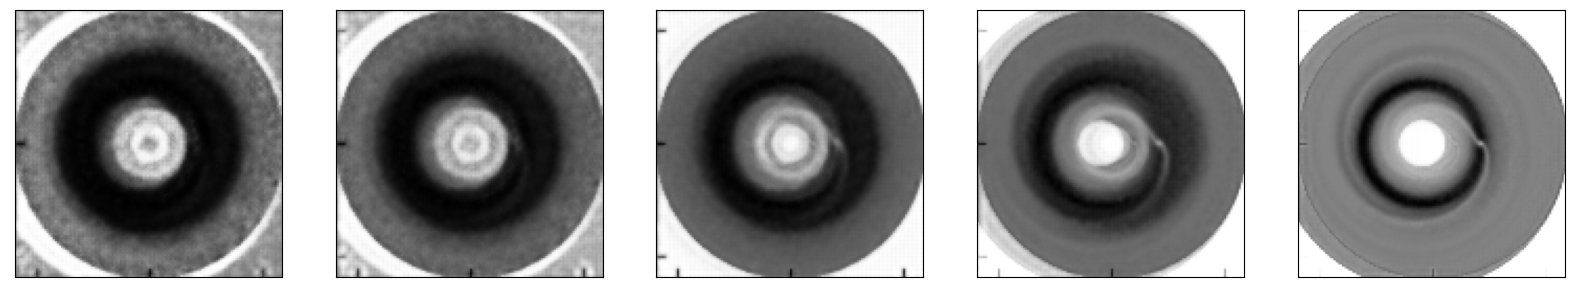

In [ ]:
# Starting point=(-2,1), end point=(0,2)
display_image_sequence(0,-4,3,2,5)

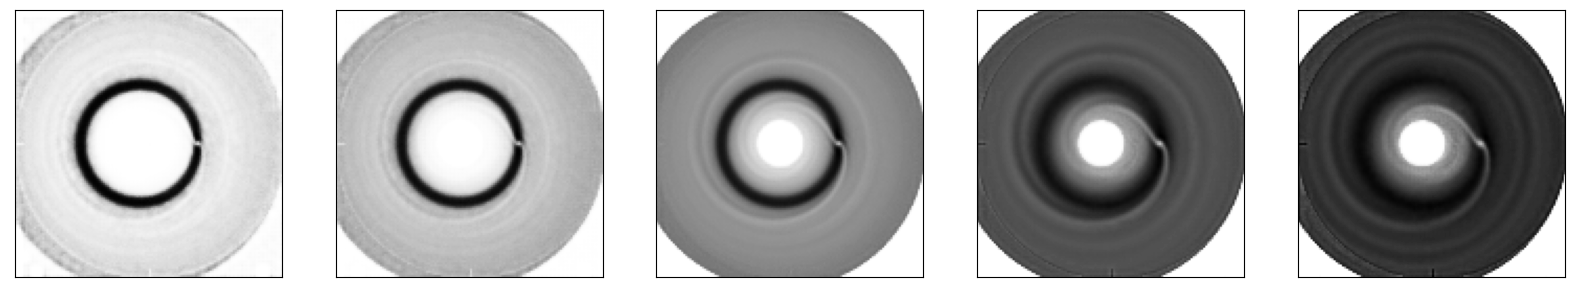

In [ ]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(-3,0,3,0,5)

In [ ]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(0,-2,0,2,7)

In [ ]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(2,-2,3,1,3)

In [ ]:
# Starting point=(0,-2), end point=(0,2)
display_image_sequence(-4,-3,3,2,9)